#### Test ABCD

In [1]:
import datetime, sys, warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import Image
from pyprojroot import here

sys.path.insert(0, f"{here()}/src")

from predict import create_testdataloader, predictbrainage
from plots import scatter_predicted_chronological, scatter_bag_age, age_distribution_plot, brainage_distribution_plot

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)
pd.reset_option("mode.chained_assignment")

Hostname is: neptune
Found 8 models, using /home/murage/Documents/repos/cnnmlp/models/2025-08-14_best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-14_best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-07-28_best_cnmlp_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-13_20epochs-best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-18_best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-17_best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-15_best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-15_L1best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-13_best_cnnmlpclassifier_model.pth


In [2]:
proj_dir = here()

#### Load ABCD Data

In [3]:
df, test_dataloader = create_testdataloader('abcd')
#abcd_test_pheno = "/home/murage/Documents/data/test/ABCD/abcd_phenotypes.csv" #"/shared/uher/Murage/BrainAgefMRI/data/test/ABCD/abcd_phenotypes.csv"

Found 1 csv files
(8753, 59)
Index: 0, 2, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-0.8527])
Index: 1, 2, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-0.9681])
Index: 2, 2, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-0.9537])


In [4]:
df.head()

,participant_id,eventname,session_id,mri_id,rsfmri_meanmotion,rsfmri_numtrs,rsfmri_subthreshnvols,scanner_model,mri_fieldstrength,mri_info_studydate,prop_tr,fam_income,prnt_1_ed,prnt_2_ed,num_ppl_in_house,race,site_id_l,rel_family_id,rel_birth_id,school_id,district_id,interview_date,interview_age,visit_type,pea_wiscv_trs,pea_wiscv_tss,fhr_dep,fhr_bd,fhr_alcohol,fhr_mood,ccbd_1,clbd_1,ccbd_2,clbd_2,ccbd_other,clbd_other,clmdd,ccmdd,clanx,ccanx,collection_3165,site,scanner_manufacturer,matched_group,sex,race_ethnicity,age,handedness,siblings_twins,income,participant_education,parental_education,anesthesia_exposure,scan_age,ageYears,filename,age_bracket,age_bracket_class,scan_age_z
0,NDARINVYVJATKX1,ses-baselineYear1Arm1,baseline_year_1_arm_1,S014_INVYVJATKX1_baseline,0.084837,1532.0,1422.0,Prisma,3.0,20170309.0,0.928198,2.0,13.0,15.0,8.0,hispanic,site16,1810.0,18101.0,99146.0,4517.0,03/09/2017,126.0,1.0,13.0,6.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site16,SIEMENS,1.0,Female,3.0,126.0,2.0,0.0,2.0,5.0,13.0,0.0,10.500000,10.500000,ABCD-sub-NDARINVYVJATKX1.nii.gz,9-11,2,-0.852724
1,NDARINVUN55AXTE,ses-baselineYear1Arm1,baseline_year_1_arm_1,P043_INVUN55AXTE_baseline,0.079259,1532.0,1441.0,Achieva dStream,3.0,20170821.0,0.940601,9.0,21.0,20.0,5.0,additional,site17,4556.0,45562.0,17194.0,13189.0,08/17/2017,118.0,1.0,20.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site17,Philips Medical Systems,1.0,Female,5.0,118.0,1.0,1.0,9.0,4.0,21.0,0.0,9.833333,9.833333,ABCD-sub-NDARINVUN55AXTE.nii.gz,9-11,2,-0.968088
2,NDARINV57CKHLC8,ses-baselineYear1Arm1,baseline_year_1_arm_1,S011_INV57CKHLC8_baseline,0.443169,1532.0,749.0,Prisma,3.0,20171227.0,0.488903,9.0,13.0,8.0,4.0,hispanic,site03,6237.0,62371.0,109300.0,621.0,12/27/2017,119.0,1.0,16.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site03,SIEMENS,1.0,Male,3.0,119.0,1.0,0.0,9.0,3.0,13.0,0.0,9.916667,9.916667,ABCD-sub-NDARINV57CKHLC8.nii.gz,9-11,2,-0.953667
3,NDARINV8DZWHUBC,ses-baselineYear1Arm1,baseline_year_1_arm_1,S011_INV8DZWHUBC_baseline,0.060514,1532.0,1475.0,Prisma,3.0,20171107.0,0.962794,3.0,18.0,NaN,3.0,hispanic,site03,6185.0,61851.0,10751.0,621.0,11/07/2017,123.0,1.0,21.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site03,SIEMENS,1.0,Female,3.0,123.0,1.0,0.0,3.0,5.0,18.0,1.0,10.250000,10.250000,ABCD-sub-NDARINV8DZWHUBC.nii.gz,9-11,2,-0.895985
4,NDARINV4BPHYB7J,ses-baselineYear1Arm1,baseline_year_1_arm_1,S065_INV4BPHYB7J_baseline,0.078906,1149.0,1078.0,Prisma_fit,3.0,20170813.0,0.938207,10.0,19.0,15.0,7.0,black,site09,9794.0,97941.0,NaN,NaN,08/13/2017,127.0,1.0,23.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site09,SIEMENS,1.0,Female,5.0,127.0,2.0,1.0,10.0,6.0,19.0,0.0,10.583333,10.583333,ABCD-sub-NDARINV4BPHYB7J.nii.gz,9-11,2,-0.838304


In [5]:
df['age_bracket_class'].describe()

count    8753.0
mean        2.0
std         0.0
min         2.0
25%         2.0
50%         2.0
75%         2.0
max         2.0
Name: age_bracket_class, dtype: float64

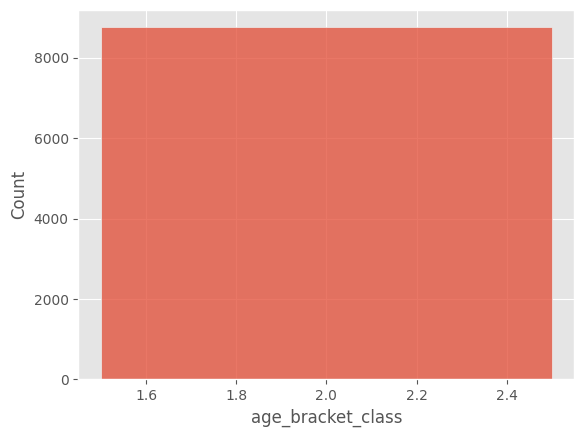

In [6]:
sns.histplot(df['age_bracket_class'])
#sns.histplot(validation['age_bracket_class'], ax=ax2)
plt.show()

#### Test on ABCD

In [7]:
modelresults = predictbrainage(test_dataloader)

In [8]:
modelresults['age'].flatten().shape

(8753,)

In [9]:
df.columns = df.columns.str.replace(' ', '')
df["chronological_age"] = modelresults["age"].flatten()
df["brain_age"] = modelresults["predicted"].flatten()
df["brain_age_gap"] = df["brain_age"] - df["scan_age"]  

In [10]:
df.sample(3)

,participant_id,eventname,session_id,mri_id,rsfmri_meanmotion,rsfmri_numtrs,rsfmri_subthreshnvols,scanner_model,mri_fieldstrength,mri_info_studydate,prop_tr,fam_income,prnt_1_ed,prnt_2_ed,num_ppl_in_house,race,site_id_l,rel_family_id,rel_birth_id,school_id,district_id,interview_date,interview_age,visit_type,pea_wiscv_trs,pea_wiscv_tss,fhr_dep,fhr_bd,fhr_alcohol,fhr_mood,ccbd_1,clbd_1,ccbd_2,clbd_2,ccbd_other,clbd_other,clmdd,ccmdd,clanx,ccanx,collection_3165,site,scanner_manufacturer,matched_group,sex,race_ethnicity,age,handedness,siblings_twins,income,participant_education,parental_education,anesthesia_exposure,scan_age,ageYears,filename,age_bracket,age_bracket_class,scan_age_z,chronological_age,brain_age,brain_age_gap
5790,NDARINVD5P9PY9L,ses-baselineYear1Arm1,baseline_year_1_arm_1,S053_INVD5P9PY9L_baseline,0.471383,1532.0,937.0,Prisma_fit,3.0,20180603.0,0.611619,8.0,16.0,19.0,5.0,white,site21,5003.0,50031.0,NaN,NaN,06/03/2018,109.0,1.0,19.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site21,SIEMENS,1.0,Female,1.0,109.0,1.0,2.0,8.0,3.0,16.0,1.0,9.083333,9.083333,ABCD-sub-NDARINVD5P9PY9L.nii.gz,9-11,2,-1.097872,-1.097872,-0.510467,-9.593800
2709,NDARINVXW0KCY31,ses-baselineYear1Arm1,baseline_year_1_arm_1,S020_INVXW0KCY31_baseline,0.402294,1532.0,806.0,Prisma,3.0,20170330.0,0.526110,8.0,19.0,15.0,5.0,black,site14,3462.0,34621.0,NaN,14845.0,03/30/2017,130.0,1.0,22.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site14,SIEMENS,2.0,Female,2.0,130.0,3.0,2.0,8.0,5.0,19.0,0.0,10.833333,10.833333,ABCD-sub-NDARINVXW0KCY31.nii.gz,9-11,2,-0.795042,-0.795042,0.005014,-10.828319
4483,NDARINVYPJK6AC5,ses-baselineYear1Arm1,baseline_year_1_arm_1,S014_INVYPJK6AC5_baseline,0.052376,1149.0,1088.0,Prisma,3.0,20161026.0,0.946910,8.0,17.0,16.0,7.0,white,site16,1806.0,18061.0,NaN,NaN,10/26/2016,116.0,1.0,17.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site16,SIEMENS,1.0,Male,1.0,116.0,2.0,0.0,8.0,4.0,17.0,1.0,9.666667,9.666667,ABCD-sub-NDARINVYPJK6AC5.nii.gz,9-11,2,-0.996929,-0.996929,-1.265970,-10.932636


In [11]:
df['chronological_age_'] = (df['chronological_age'] * 5.778836817291233) + 15.427753927254452
df['brainage_'] = (df['brain_age'] * 5.778836817291233) + 15.427753927254452
df['brainagegap_'] = df['brainage_'] - df['chronological_age_']

In [12]:
df[['participant_id', 'scan_age', 'chronological_age_', 'brainage_']].sample(5)

,participant_id,scan_age,chronological_age_,brainage_
7681,NDARINVMHJ04F4G,10.166667,10.166667,13.369194
171,NDARINV9JCYGTV3,10.166667,10.166667,14.120348
6250,NDARINVVGTN3KC5,10.500000,10.500000,12.487955
5342,NDARINVYJL7Y7CB,9.083333,9.083334,15.730999
811,NDARINVZXPAWB32,10.500000,10.500000,11.859400


In [14]:
df.drop(['chronological_age', 'brain_age', 'brain_age_gap'], axis=1, inplace=True)
df.rename(columns={'chronological_age_': 'chronological_age', 'brainage_': 'brain_age', 'brainagegap_': 'brain_age_gap'}, inplace=True)

In [15]:
df.head()

,participant_id,eventname,session_id,mri_id,rsfmri_meanmotion,rsfmri_numtrs,rsfmri_subthreshnvols,scanner_model,mri_fieldstrength,mri_info_studydate,prop_tr,fam_income,prnt_1_ed,prnt_2_ed,num_ppl_in_house,race,site_id_l,rel_family_id,rel_birth_id,school_id,district_id,interview_date,interview_age,visit_type,pea_wiscv_trs,pea_wiscv_tss,fhr_dep,fhr_bd,fhr_alcohol,fhr_mood,ccbd_1,clbd_1,ccbd_2,clbd_2,ccbd_other,clbd_other,clmdd,ccmdd,clanx,ccanx,collection_3165,site,scanner_manufacturer,matched_group,sex,race_ethnicity,age,handedness,siblings_twins,income,participant_education,parental_education,anesthesia_exposure,scan_age,ageYears,filename,age_bracket,age_bracket_class,scan_age_z,chronological_age,brain_age,brain_age_gap
0,NDARINVYVJATKX1,ses-baselineYear1Arm1,baseline_year_1_arm_1,S014_INVYVJATKX1_baseline,0.084837,1532.0,1422.0,Prisma,3.0,20170309.0,0.928198,2.0,13.0,15.0,8.0,hispanic,site16,1810.0,18101.0,99146.0,4517.0,03/09/2017,126.0,1.0,13.0,6.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site16,SIEMENS,1.0,Female,3.0,126.0,2.0,0.0,2.0,5.0,13.0,0.0,10.500000,10.500000,ABCD-sub-NDARINVYVJATKX1.nii.gz,9-11,2,-0.852724,10.500000,10.699437,0.199437
1,NDARINVUN55AXTE,ses-baselineYear1Arm1,baseline_year_1_arm_1,P043_INVUN55AXTE_baseline,0.079259,1532.0,1441.0,Achieva dStream,3.0,20170821.0,0.940601,9.0,21.0,20.0,5.0,additional,site17,4556.0,45562.0,17194.0,13189.0,08/17/2017,118.0,1.0,20.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site17,Philips Medical Systems,1.0,Female,5.0,118.0,1.0,1.0,9.0,4.0,21.0,0.0,9.833333,9.833333,ABCD-sub-NDARINVUN55AXTE.nii.gz,9-11,2,-0.968088,9.833334,18.839466,9.006132
2,NDARINV57CKHLC8,ses-baselineYear1Arm1,baseline_year_1_arm_1,S011_INV57CKHLC8_baseline,0.443169,1532.0,749.0,Prisma,3.0,20171227.0,0.488903,9.0,13.0,8.0,4.0,hispanic,site03,6237.0,62371.0,109300.0,621.0,12/27/2017,119.0,1.0,16.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site03,SIEMENS,1.0,Male,3.0,119.0,1.0,0.0,9.0,3.0,13.0,0.0,9.916667,9.916667,ABCD-sub-NDARINV57CKHLC8.nii.gz,9-11,2,-0.953667,9.916668,14.171715,4.255047
3,NDARINV8DZWHUBC,ses-baselineYear1Arm1,baseline_year_1_arm_1,S011_INV8DZWHUBC_baseline,0.060514,1532.0,1475.0,Prisma,3.0,20171107.0,0.962794,3.0,18.0,NaN,3.0,hispanic,site03,6185.0,61851.0,10751.0,621.0,11/07/2017,123.0,1.0,21.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site03,SIEMENS,1.0,Female,3.0,123.0,1.0,0.0,3.0,5.0,18.0,1.0,10.250000,10.250000,ABCD-sub-NDARINV8DZWHUBC.nii.gz,9-11,2,-0.895985,10.250000,11.867190,1.617190
4,NDARINV4BPHYB7J,ses-baselineYear1Arm1,baseline_year_1_arm_1,S065_INV4BPHYB7J_baseline,0.078906,1149.0,1078.0,Prisma_fit,3.0,20170813.0,0.938207,10.0,19.0,15.0,7.0,black,site09,9794.0,97941.0,NaN,NaN,08/13/2017,127.0,1.0,23.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,site09,SIEMENS,1.0,Female,5.0,127.0,2.0,1.0,10.0,6.0,19.0,0.0,10.583333,10.583333,ABCD-sub-NDARINV4BPHYB7J.nii.gz,9-11,2,-0.838304,10.583334,10.880295,0.296961


In [18]:
df = df[['participant_id', 'fhr_dep', 'fhr_bd', 'fhr_mood', 'clmdd', 'clanx', 'sex', 'scan_age', 'filename', 
         'age_bracket', 'age_bracket_class', 'scan_age_z', 'chronological_age', 'brain_age', 'brain_age_gap']]

In [19]:
datem = datetime.datetime.today().strftime("%Y-%m-%d")
df.to_csv(f"{here()}/data/processed/{datem}_abcd_cnnmlp_predictions.csv", index=False)

#### Plots

In [20]:
df = pd.read_csv(f"{here()}/data/processed/2025-08-21_abcd_cnnmlp_predictions.csv")

In [21]:
df.head(3)

,participant_id,fhr_dep,fhr_bd,fhr_mood,clmdd,clanx,sex,scan_age,filename,age_bracket,age_bracket_class,scan_age_z,chronological_age,brain_age,brain_age_gap
0,NDARINVYVJATKX1,0.0,1.0,1.0,0.0,0.0,Female,10.500000,ABCD-sub-NDARINVYVJATKX1.nii.gz,9-11,2,-0.852724,10.500000,10.699437,0.199437
1,NDARINVUN55AXTE,0.0,0.0,0.0,0.0,0.0,Female,9.833333,ABCD-sub-NDARINVUN55AXTE.nii.gz,9-11,2,-0.968088,9.833334,18.839466,9.006132
2,NDARINV57CKHLC8,0.0,0.0,0.0,0.0,0.0,Male,9.916667,ABCD-sub-NDARINV57CKHLC8.nii.gz,9-11,2,-0.953667,9.916668,14.171715,4.255047


In [22]:
age_distribution_plot(df, 'abcd', 'blue')

<ggplot: (640 x 480)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/abcd_age_distribution.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_histogram : Removed 3 rows containing missing values.


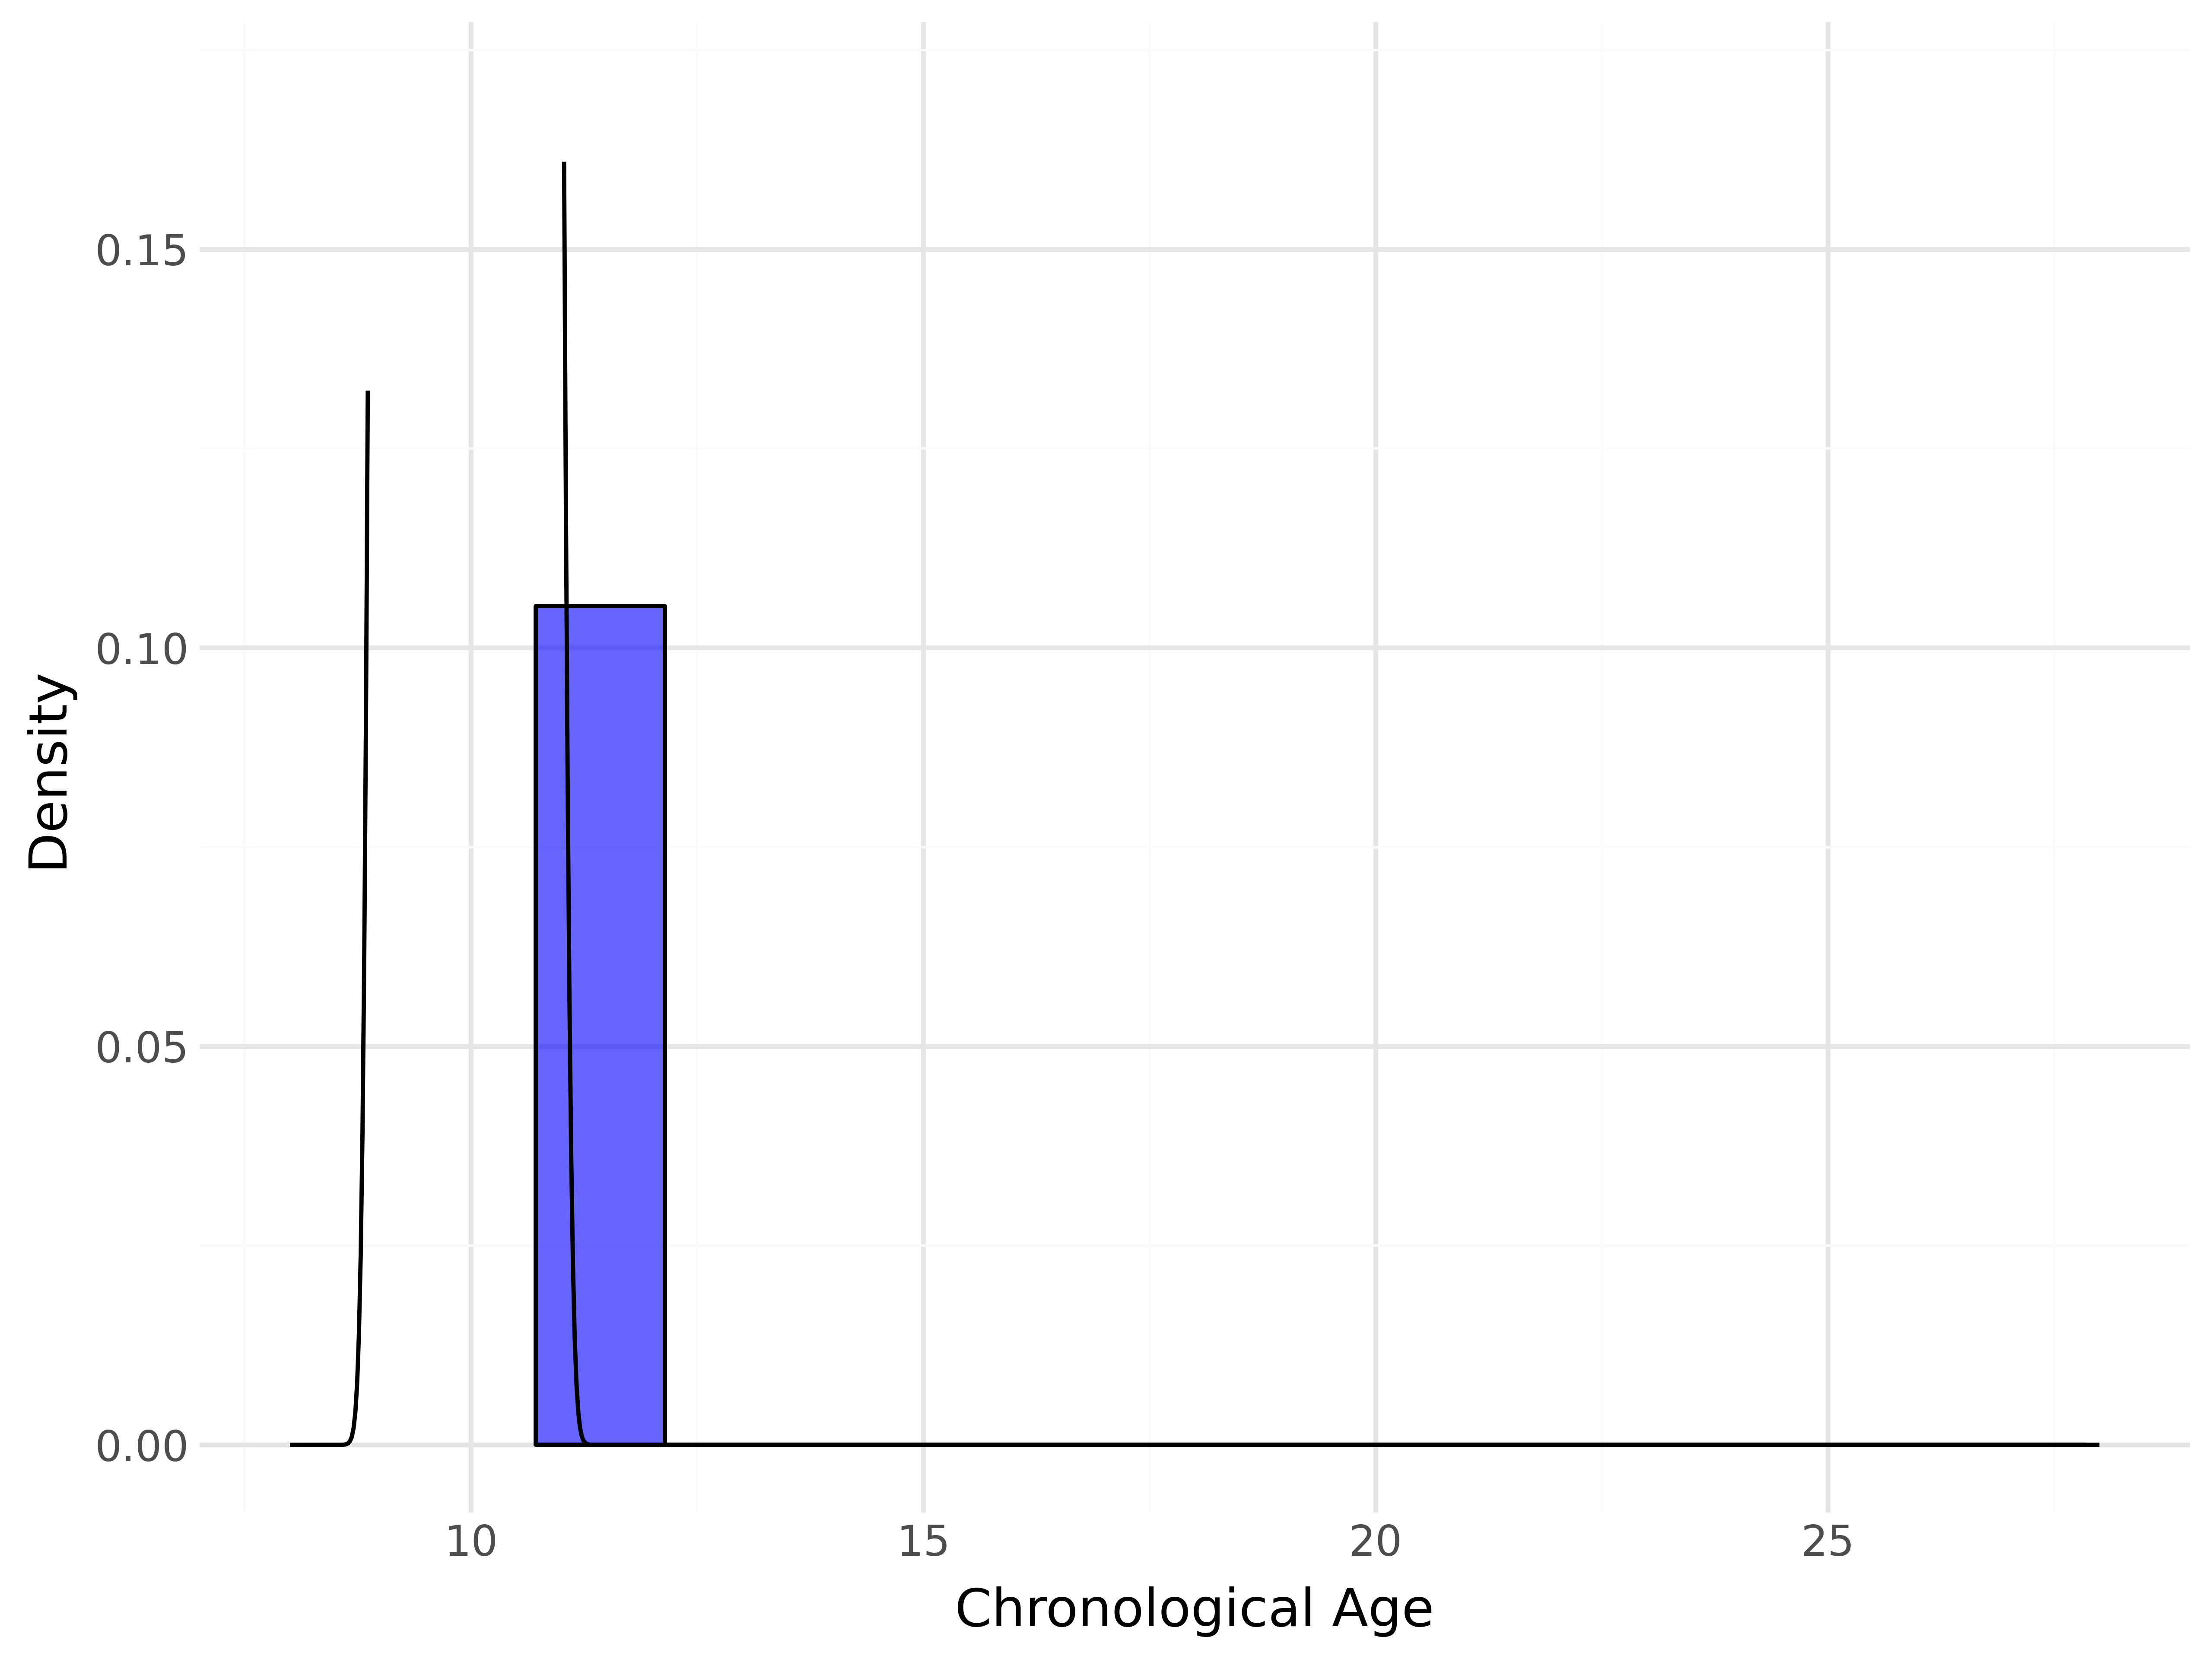

In [23]:
Image(f"{here()}/figures/abcd_age_distribution.png")

In [24]:
scatter_predicted_chronological(df, 'abcd')

min age: 9.0, median: 9.916668, max: 10.916668
<ggplot: (800 x 800)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 8 x 8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/abcd_chronological_predicted_plot.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


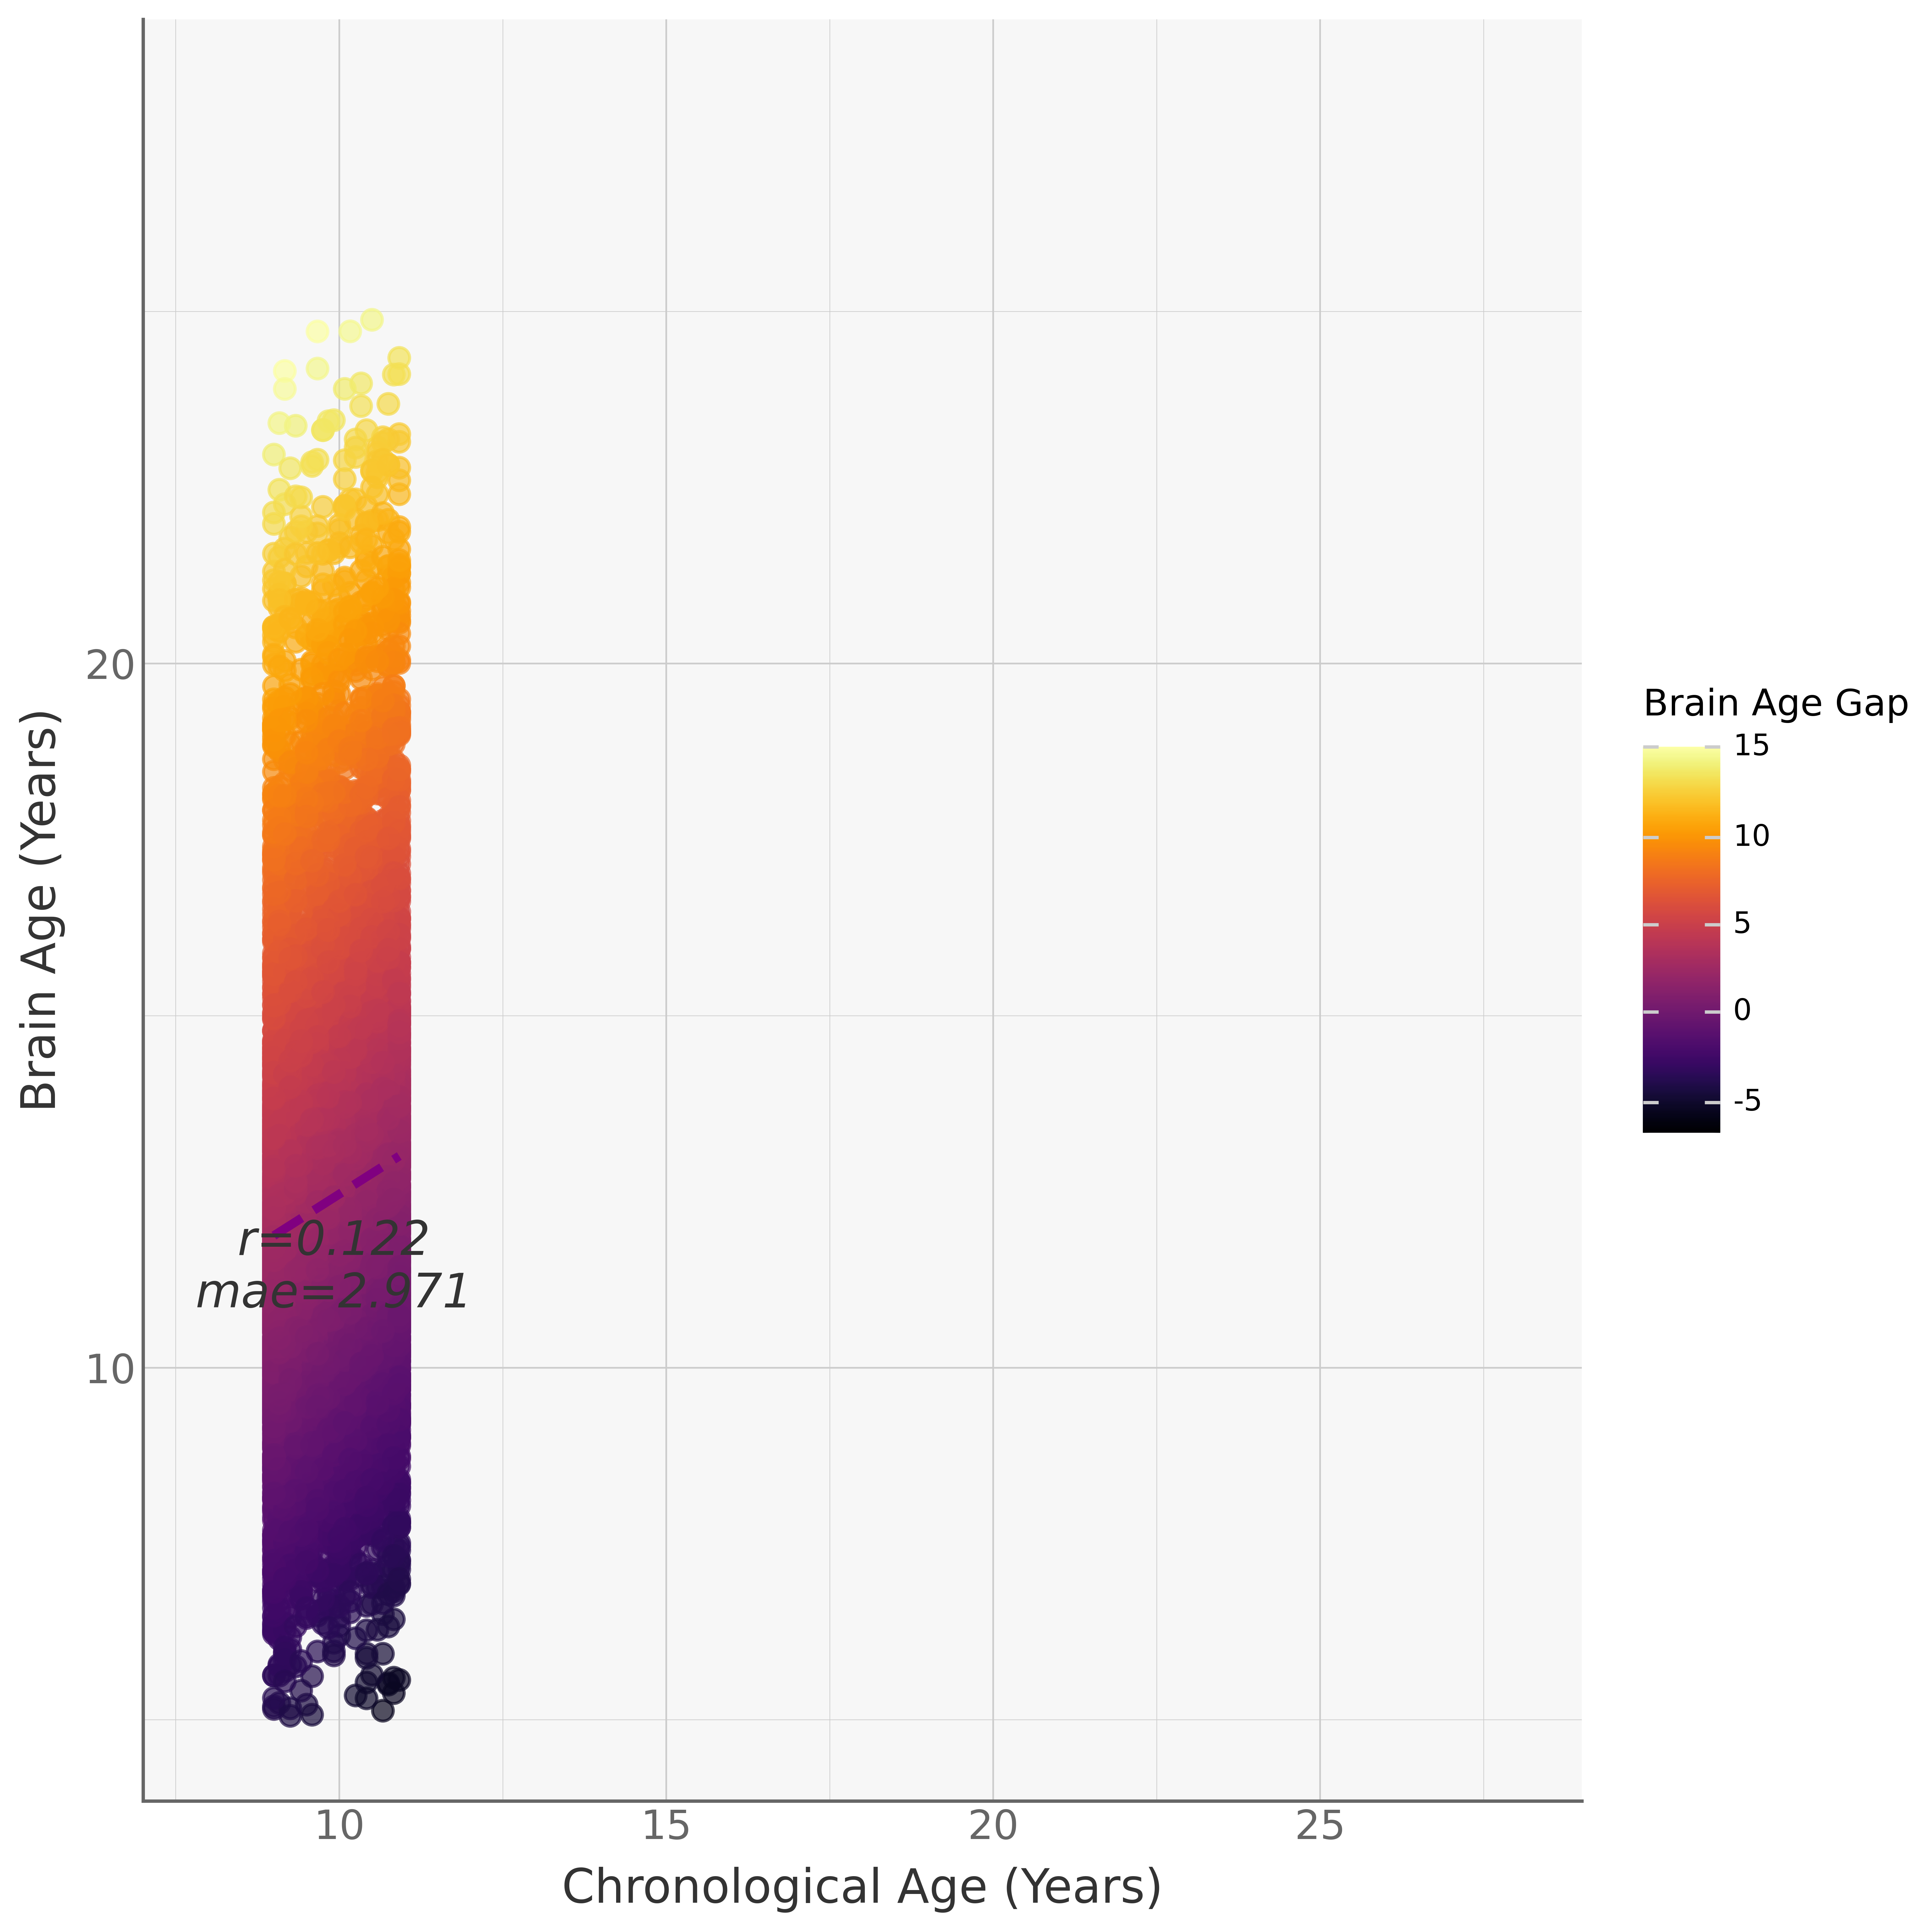

In [25]:
Image(f"{here()}/figures/abcd_chronological_predicted_plot.png")

In [26]:
scatter_bag_age(df, "abcd")

min age: 9.0, median: 9.916668, max: 10.916668
<ggplot: (640 x 480)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/abcd_bag_age_plot.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 75 rows containing missing values.


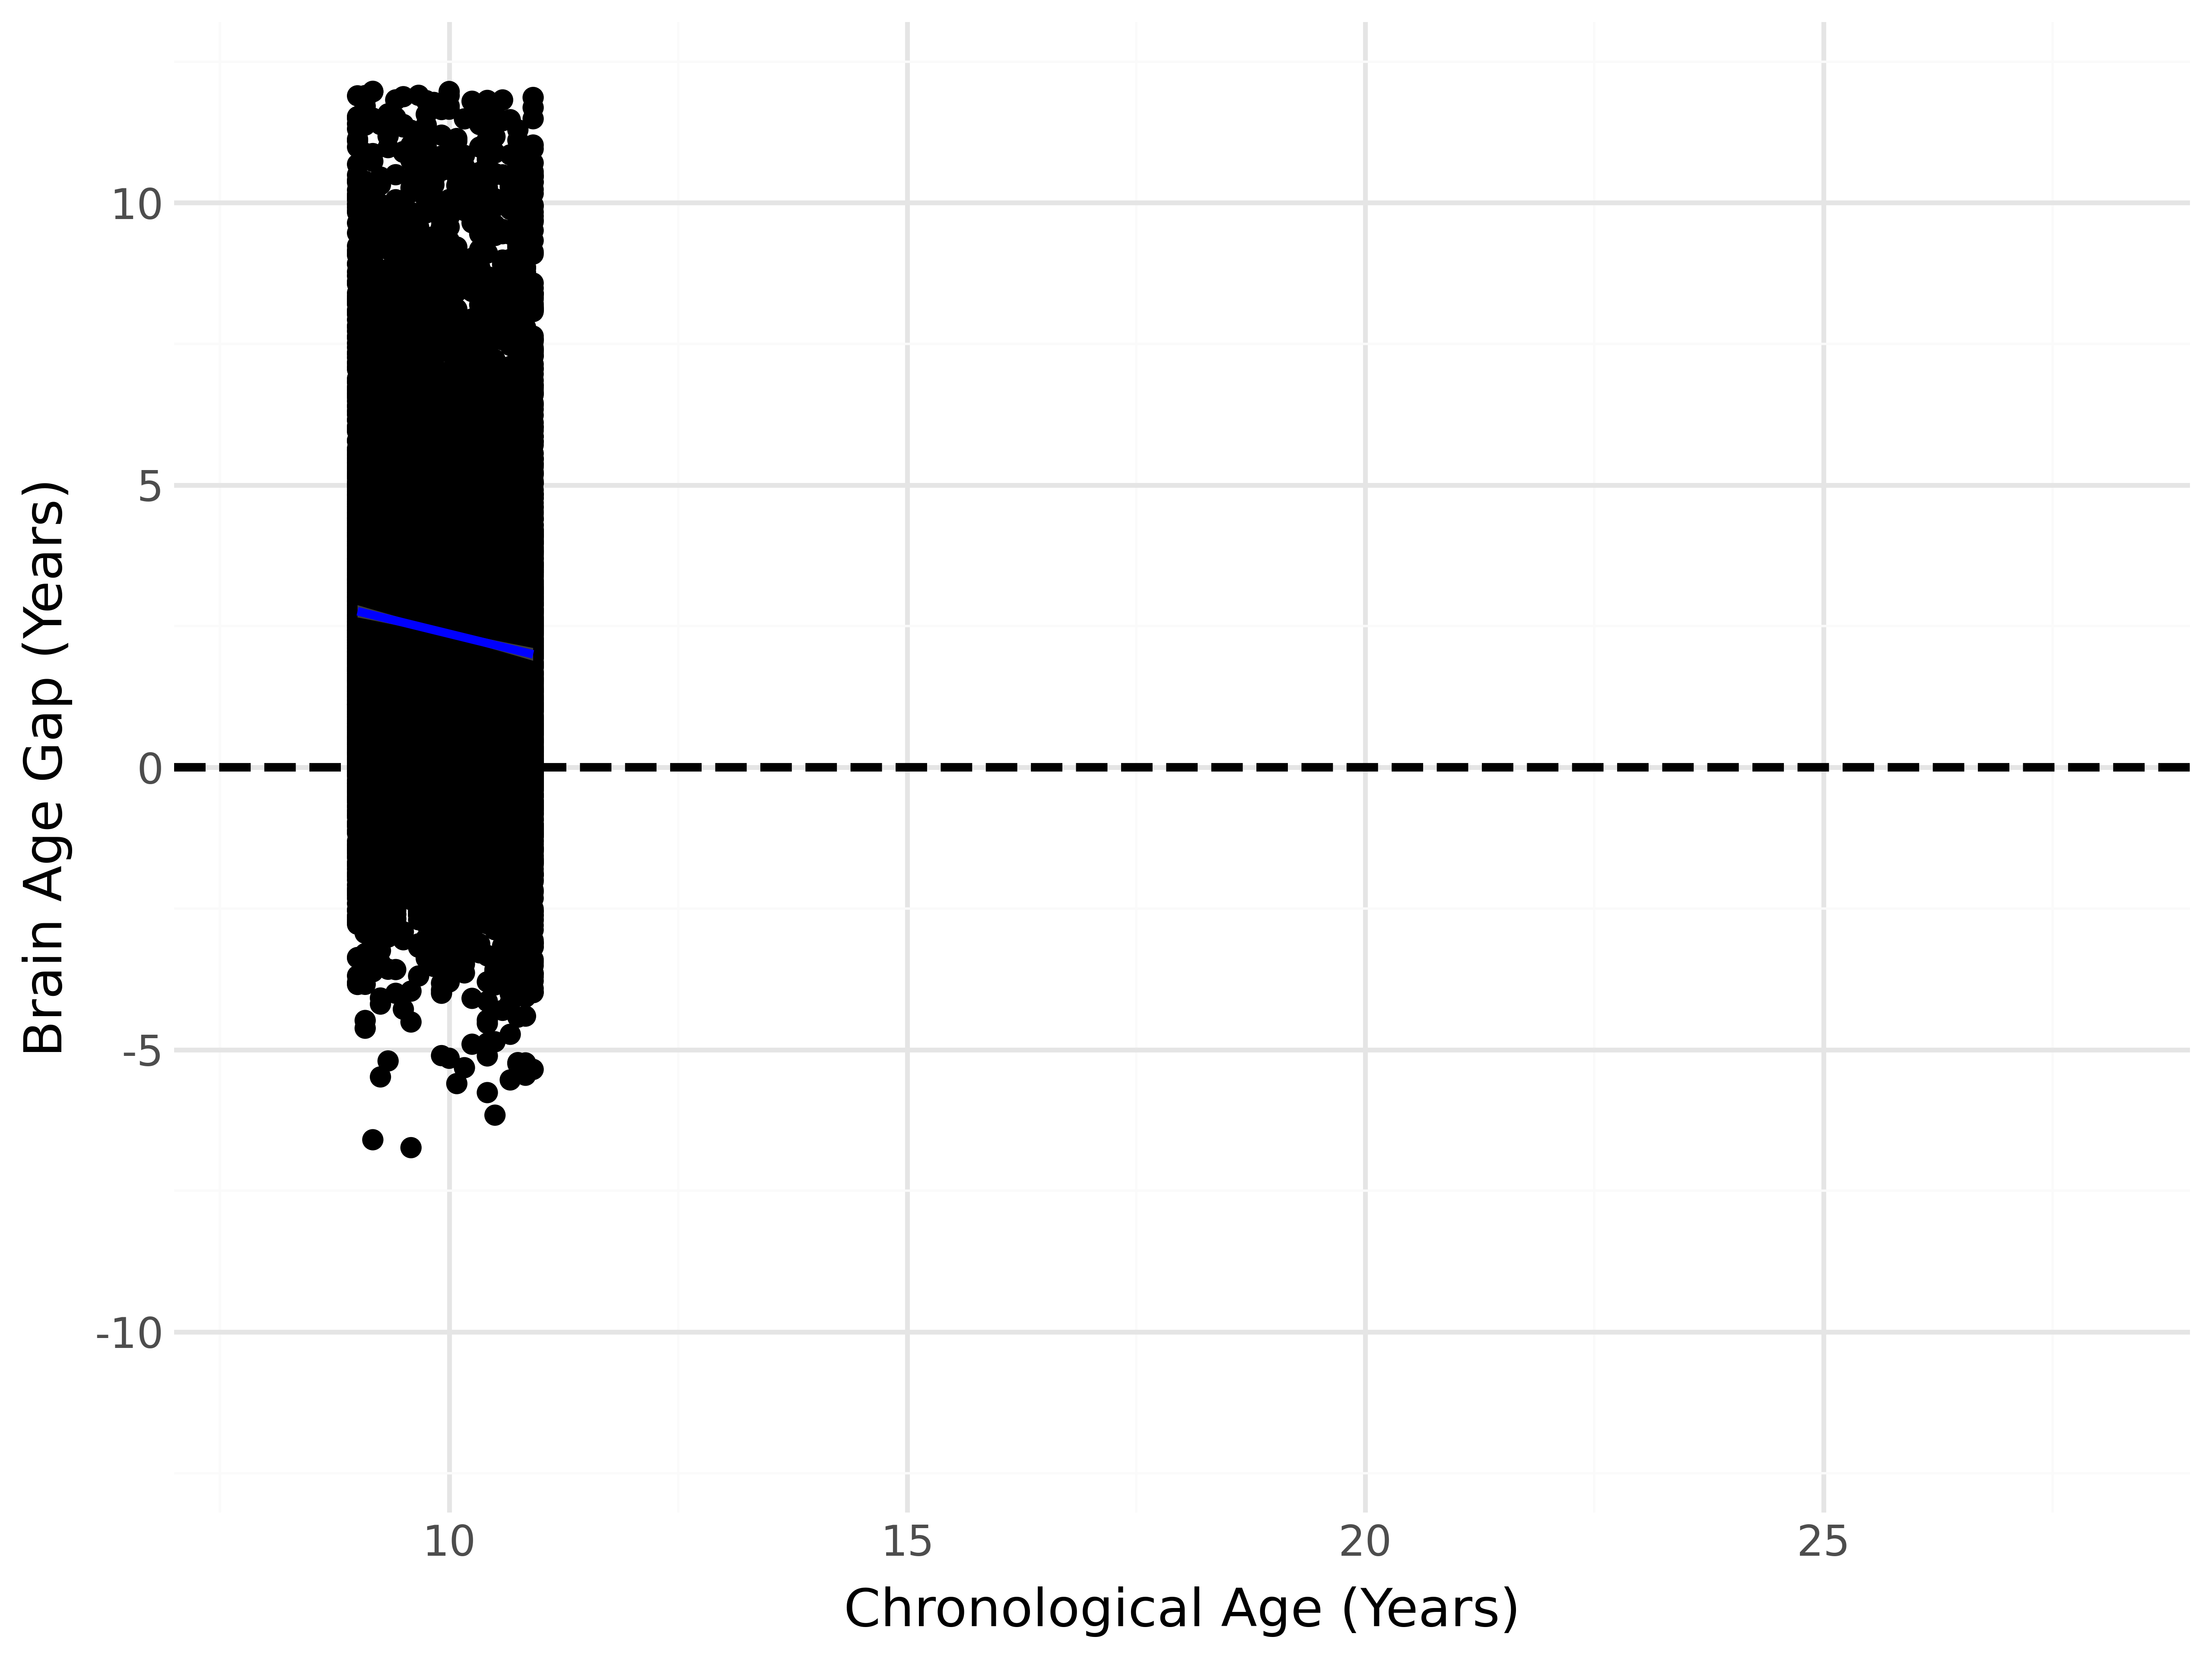

In [27]:
Image(f"{here()}/figures/abcd_bag_age_plot.png")

In [28]:
brainage_distribution_plot(df, 'abcd', 'blue')

<ggplot: (640 x 480)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/abcd_brainage_distribution.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin : Removed 369 rows containing non-finite values.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_density : Removed 369 rows containing non-finite values.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


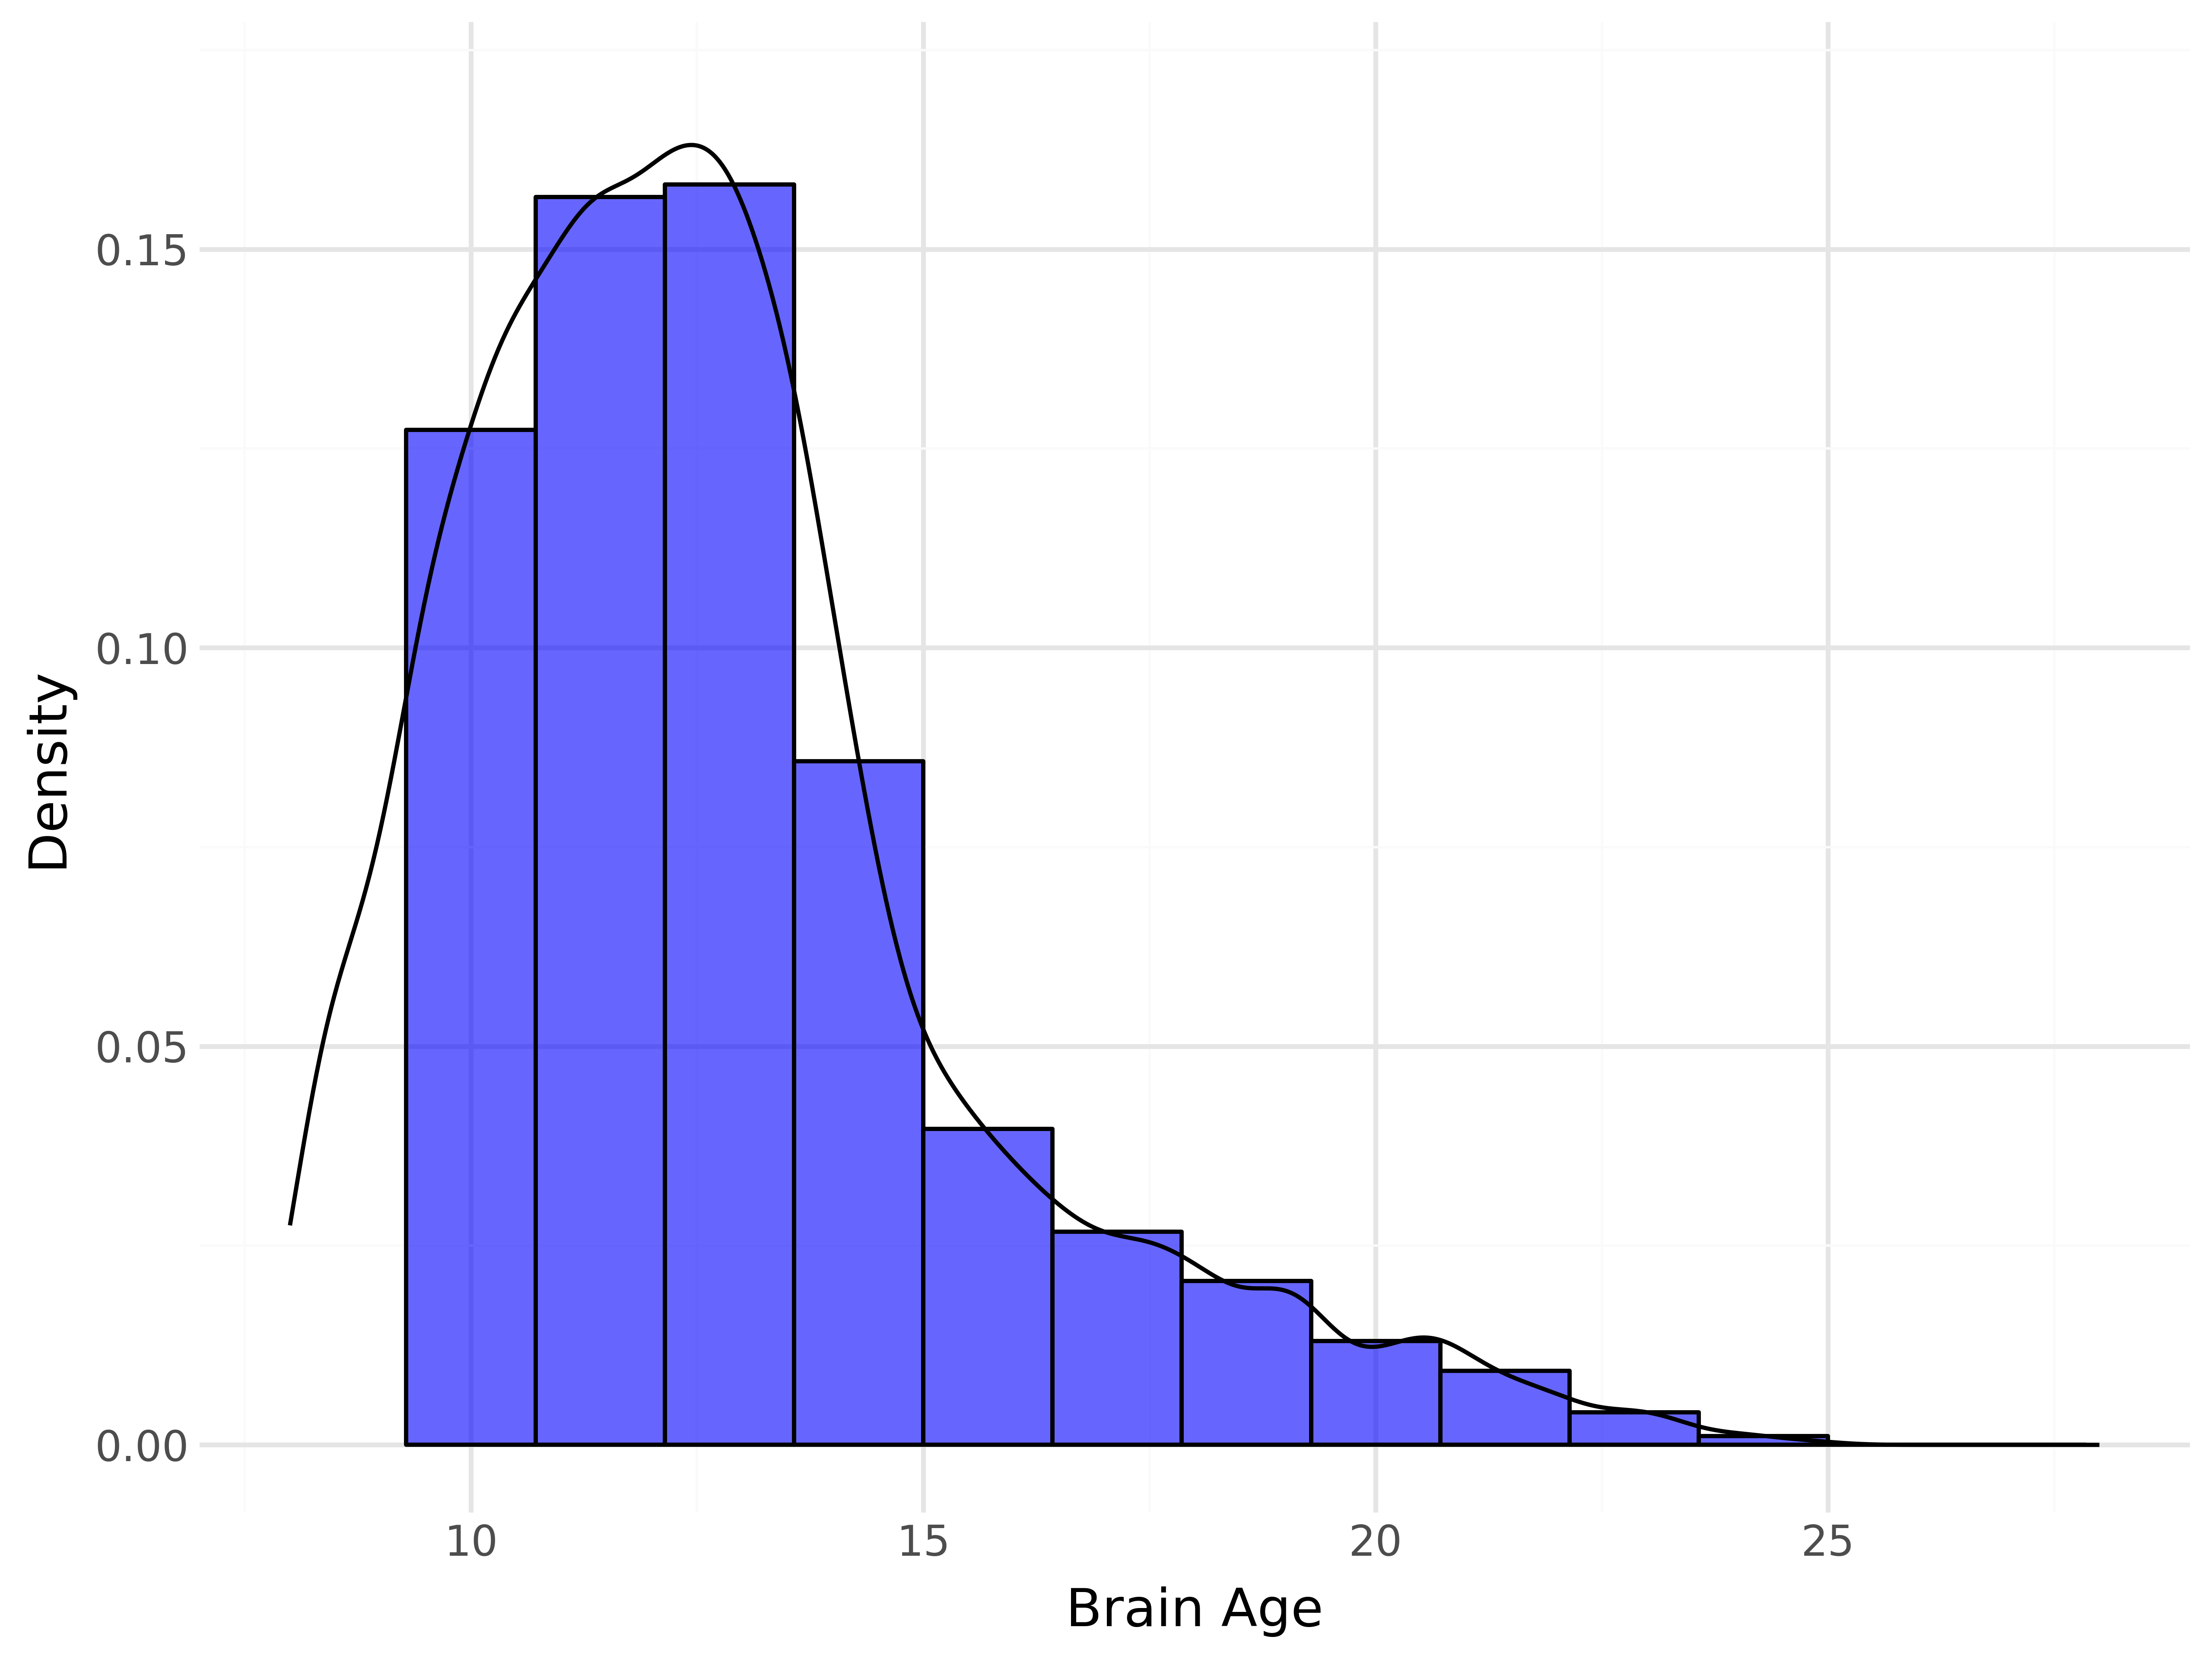

In [29]:
Image(f"{here()}/figures/abcd_brainage_distribution.png")

- Standardize age for train, validation 
- Remove classification task
- Plot mean prediction, of training data (training and validation) alongside train and validation loss